In [49]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
data = pd.read_csv('data/raw_dataset.csv')
data.shape

(4424, 35)

In [34]:
course_names = pd.read_csv("categories/tA4_course_names.csv")
course_dict = dict(zip(course_names["ID"], course_names["Course_Name"]))
data['Course'] = data['Course'].replace(course_dict)

### EDA


In [35]:
data.groupby(['GDP','Inflation rate','Unemployment rate']).size()

GDP    Inflation rate  Unemployment rate
-4.06   2.8            15.5                 397
-3.12  -0.8            9.4                  533
-1.70   3.7            12.7                 419
-0.92   0.3            16.2                 362
 0.32   2.6            7.6                  571
 0.79  -0.3            13.9                 390
 1.74   1.4            10.8                 525
 1.79   0.5            12.4                 445
 2.02   0.6            11.1                 414
 3.51   1.4            8.9                  368
dtype: int64

In [48]:
data["Mother's qualification"].value_counts()

Mother's qualification
1     1069
22    1009
13     953
23     562
3      438
19     130
2       83
4       49
10      42
5       21
25       9
7        8
24       8
26       6
6        4
27       4
28       4
17       3
8        3
9        3
21       3
20       3
18       3
11       2
12       1
14       1
16       1
15       1
29       1
Name: count, dtype: int64

In [5]:
data['Course'].value_counts()

Course
Nursing                                 766
Management                              380
Social Service                          355
Veterinary Nursing                      337
Journalism and Communication            331
Advertising and Marketing Management    268
Management (evening attendance)         268
Tourism                                 252
Communication Design                    226
Animation and Multimedia Design         215
Social Service (evening attendance)     215
Agronomy                                210
Basic Education                         192
Informatics Engineering                 170
Equiniculture                           141
Oral Hygiene                             86
Biofuel Production Technologies          12
Name: count, dtype: int64

In [6]:
data[data['Curricular units 1st sem (grade)']==0]['Application mode'].value_counts()

Application mode
12    225
1     214
8     102
14     57
4      42
9      25
15     25
13     12
16      6
7       4
6       3
3       2
5       1
Name: count, dtype: int64

In [7]:
data[data['Curricular units 1st sem (grade)']==0]['Application mode'].value_counts(normalize=True).round(2)

Application mode
12    0.31
1     0.30
8     0.14
14    0.08
4     0.06
9     0.03
15    0.03
13    0.02
16    0.01
7     0.01
6     0.00
3     0.00
5     0.00
Name: proportion, dtype: float64

In [8]:
px.histogram(data[(data['Curricular units 1st sem (grade)']>=0) & (data['Course']=='Nursing')], x = 'Curricular units 1st sem (grade)', color = "GDP", barmode='group', marginal="box")

In [9]:
data['GDP'].value_counts()

GDP
 0.32    571
-3.12    533
 1.74    525
 1.79    445
-1.70    419
 2.02    414
-4.06    397
 0.79    390
 3.51    368
-0.92    362
Name: count, dtype: int64

In [10]:
data['Inflation rate'].value_counts()

Inflation rate
 1.4    893
 2.6    571
-0.8    533
 0.5    445
 3.7    419
 0.6    414
 2.8    397
-0.3    390
 0.3    362
Name: count, dtype: int64

In [11]:
data['Unemployment rate'].value_counts()

Unemployment rate
7.6     571
9.4     533
10.8    525
12.4    445
12.7    419
11.1    414
15.5    397
13.9    390
8.9     368
16.2    362
Name: count, dtype: int64

In [12]:
data['Target'].value_counts(sort=True)

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [13]:
data['Target'].value_counts(sort=False)

Target
Dropout     1421
Graduate    2209
Enrolled     794
Name: count, dtype: int64

In [14]:
data['Course'].value_counts(sort=True, normalize=True).reset_index()

,Course,proportion
0,Nursing,0.173146
1,Management,0.085895
2,Social Service,0.080244
3,Veterinary Nursing,0.076175
4,Journalism and Communication,0.074819
5,Advertising and Marketing Management,0.060579
6,Management (evening attendance),0.060579
7,Tourism,0.056962
8,Communication Design,0.051085
9,Animation and Multimedia Design,0.048599


In [15]:
top_courses = data['Course'].value_counts(sort=True, normalize=True).round(3).reset_index()
px.bar(top_courses, x='Course', y='proportion')

In [16]:
top_courses['Course'].head(7)

0                                 Nursing
1                              Management
2                          Social Service
3                      Veterinary Nursing
4            Journalism and Communication
5    Advertising and Marketing Management
6         Management (evening attendance)
Name: Course, dtype: object

In [17]:
px.histogram(data[data['Course'].isin(top_courses['Course'].head(7)) & (data["Curricular units 1st sem (grade)"]>0)], x="Curricular units 1st sem (grade)", color = "Course", barmode='group', marginal="box")

### Dropout prediction

In [18]:
data['is_enrolled'] = data['Target']=='Enrolled'
enrollment_rate = data.groupby('GDP')['is_enrolled'].mean().round(2)
enrollment_rate

GDP
-4.06    0.17
-3.12    0.20
-1.70    0.15
-0.92    0.13
 0.32    0.21
 0.79    0.16
 1.74    0.17
 1.79    0.20
 2.02    0.16
 3.51    0.21
Name: is_enrolled, dtype: float64

In [19]:
data['Marital status'].value_counts()


Marital status
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64

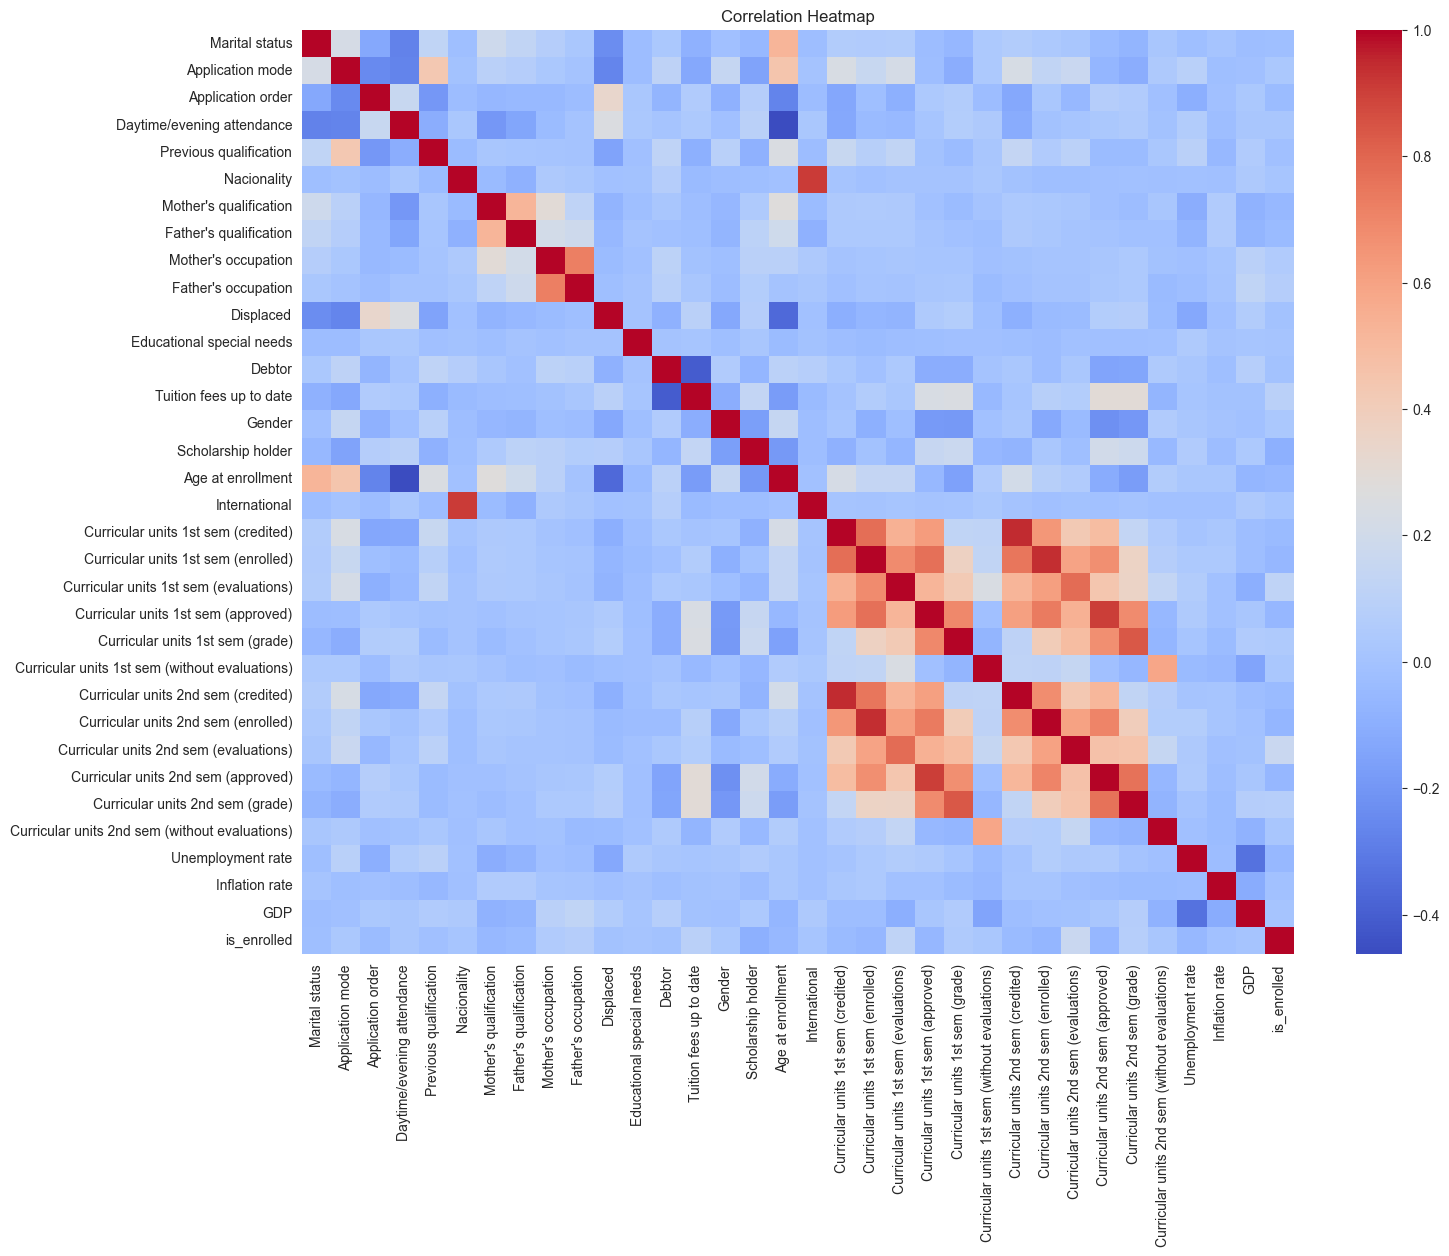

In [26]:
corr = data.corr(numeric_only=True)
plt.figure(figsize=(16, 12))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()